In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv')
print("Input Data")
data.shape

Input Data


(284807, 31)

In [3]:
data = pd.read_csv('C:\\Users\\Amena\\Desktop\\creditcard.csv',sep=',')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data.isnull().values.any()

False

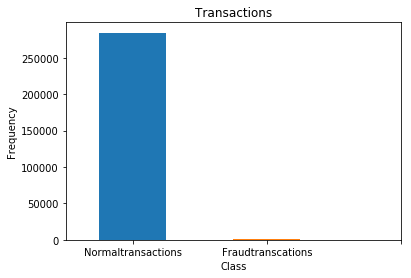

In [7]:
import sklearn
import scipy
import matplotlib.pyplot as plt
labels = ["Normaltransactions", "Fraudtranscations"]
class_count = pd.value_counts(data['Class'], sort = True)#Returns object containing counts of unique values by sorting
class_count.plot(kind = 'bar', rot=0)
plt.title("Transactions")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
#Check the number of valid transactions in the entire dataset
valid_transactions = data[data['Class']==0]
x= valid_transactions.shape
print("Valid Cases : ", x)

#Check the number of fraud transactions in the entire dataset
fraud_transactions = data[data['Class']==1]
y = fraud_transactions.shape
print("Fraud Cases : ", y)

Valid Cases :  (284315, 31)
Fraud Cases :  (492, 31)


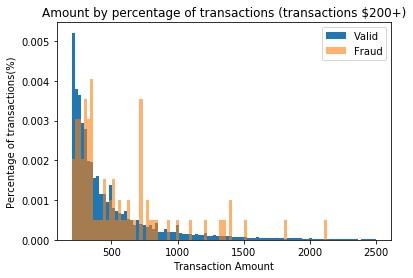

In [10]:
import warnings
warnings.filterwarnings('ignore')
#Plotting the high value transactions
bins = np.linspace(200, 2500, 100)
plt.hist(valid_transactions.Amount, bins, alpha=1, normed=True, label='Valid')
plt.hist(fraud_transactions.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction Amount")
plt.ylabel("Percentage of transactions(%)");
plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler

import time

# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)


In [12]:

scaled_time = data['scaled_time']
scaled_amount = data['scaled_amount']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
#  For normal distribution of the classes we need to balance the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
valid_data = data.loc[data['Class'] == 0][:492]

normal_distribution = pd.concat([fraud_data, valid_data])

# Shuffle dataframe rows
dist_data = normal_distribution.sample(frac=1, random_state=42)

dist_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
65324,0.041920,-0.389619,1.267948,-1.268367,0.319915,-1.642601,-0.723359,1.333815,-1.358769,0.514858,...,-0.454195,-0.040579,0.348177,0.144295,-1.038347,0.026567,-0.095473,0.092972,-0.002676,0
14197,1.089779,-0.698563,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,...,1.534920,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1
236822,1.264585,0.755155,-0.733395,-1.169137,-0.133115,-3.207148,1.024688,-0.505551,0.305560,-0.157687,...,0.097682,-0.139491,-0.467527,0.080364,-1.484517,0.108445,-0.360015,0.039060,0.133385,0
140786,-0.293440,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,...,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1
95534,0.138476,-0.227141,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,...,0.062908,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1


Distribution of the Classes after the sub sampling dataset
1    0.5
0    0.5
Name: Class, dtype: float64


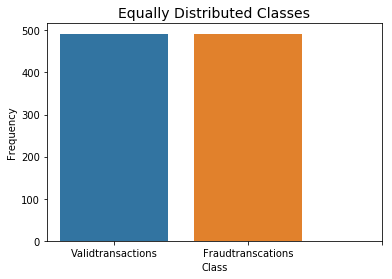

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Distribution of the Classes after the sub sampling dataset')
print(dist_data['Class'].value_counts()/len(dist_data))

labels = ["Validtransactions", "Fraudtranscations"]

sns.countplot('Class', data=dist_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()

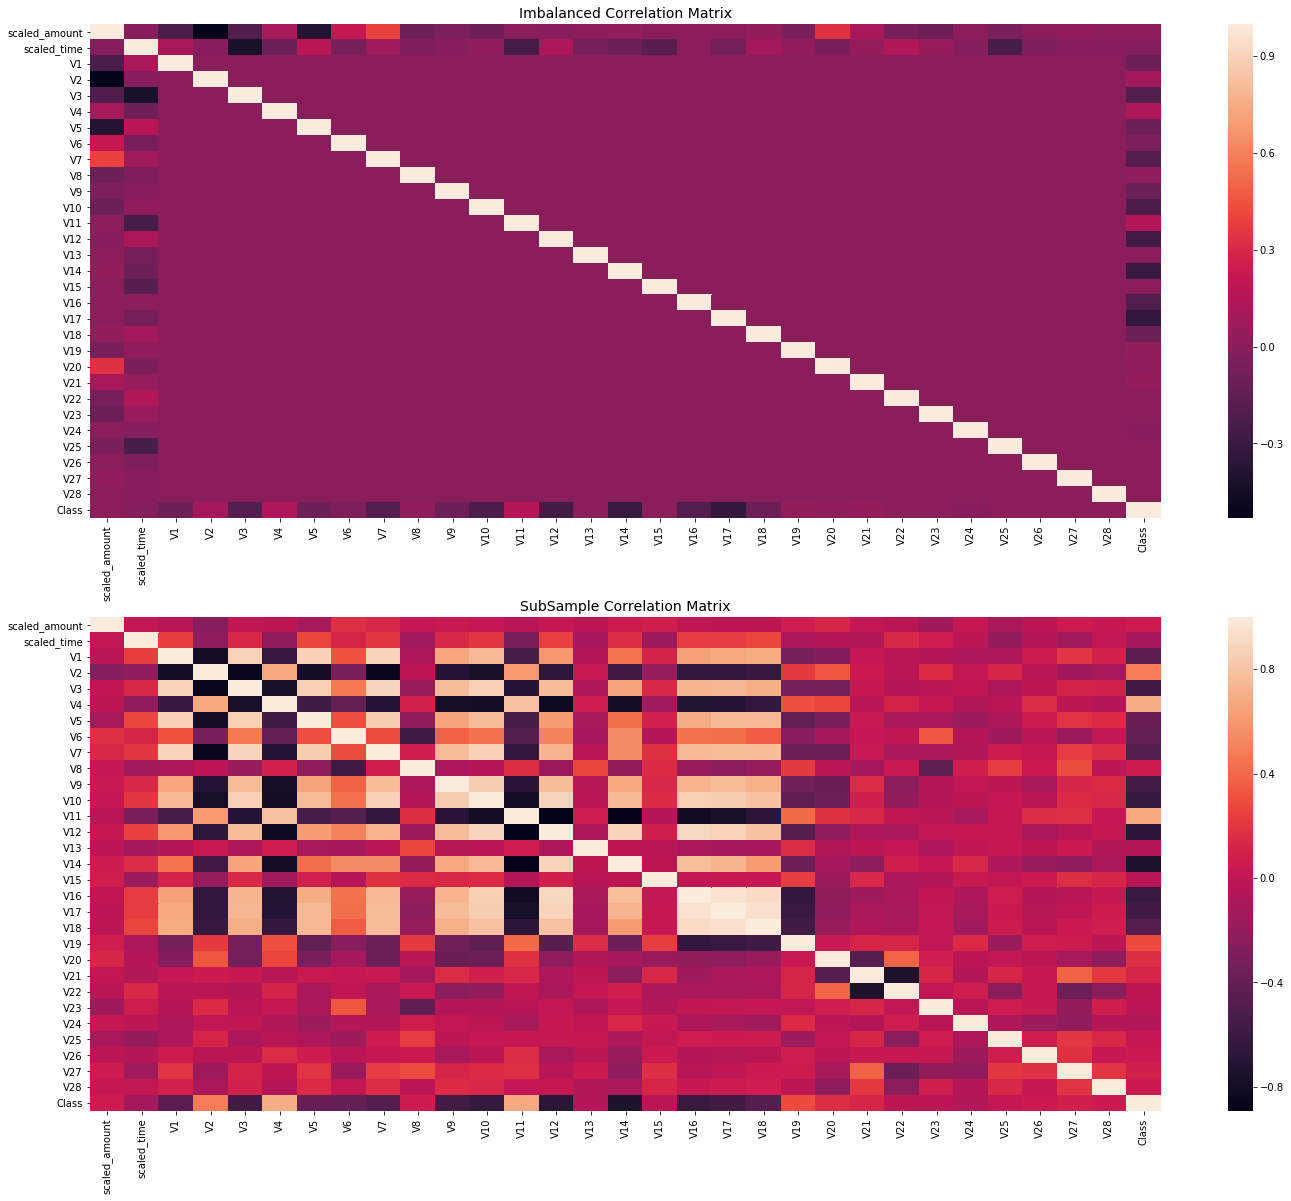

In [15]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
correlation = data.corr()
sns.heatmap(correlation, ax=axis1)
axis1.set_title("Imbalanced Correlation Matrix", fontsize=14)


subsamp_correlation = dist_data.corr()
sns.heatmap(subsamp_correlation, ax=axis2)
axis2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

In [18]:
# Undersampling before cross validating (prone to overfit)
features = dist_data.drop('Class', axis=1)
label = dist_data['Class']
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = x_train.values
X_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
#importing the required libraries
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [21]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV,RandomizedSearchCV

def train_test_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    
    print("\nAccuracy Scores on Train data")
    print("Accuracy score:", accuracy_score(y_train, y_pred))
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))
    
    
    print("\nAccuracy Scores on Cross validation data")
    y_pred_cv = cross_val_predict(model,x_train,y_train,cv=5)
    print("F1 Score: ", f1_score(y_train,y_pred_cv))
    print("Precision Score: ", precision_score(y_train,y_pred_cv))
    print("Recall Score: ", recall_score(y_train,y_pred_cv))



    print("\nAccuracy Scores on Test data")
    y_pred_test = model.predict(x_test)
    print("\nAccuracy score:", accuracy_score(y_test, y_pred_test))
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    axis1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Train Data")

    axis3 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='viridis',annot=True)
    plt.title("Confusion Matrix - Test Data")


Accuracy Scores on Train data
Accuracy score: 0.9440914866581956
F1 Score:  0.9408602150537635
Precision Score:  0.9668508287292817
Recall Score:  0.9162303664921466

Accuracy Scores on Cross validation data
F1 Score:  0.923489932885906
Precision Score:  0.9476584022038568
Recall Score:  0.900523560209424

Accuracy Scores on Test data

Accuracy score: 0.9238578680203046
F1 Score:  0.9289099526066351
Precision Score:  0.9702970297029703
Recall Score:  0.8909090909090909


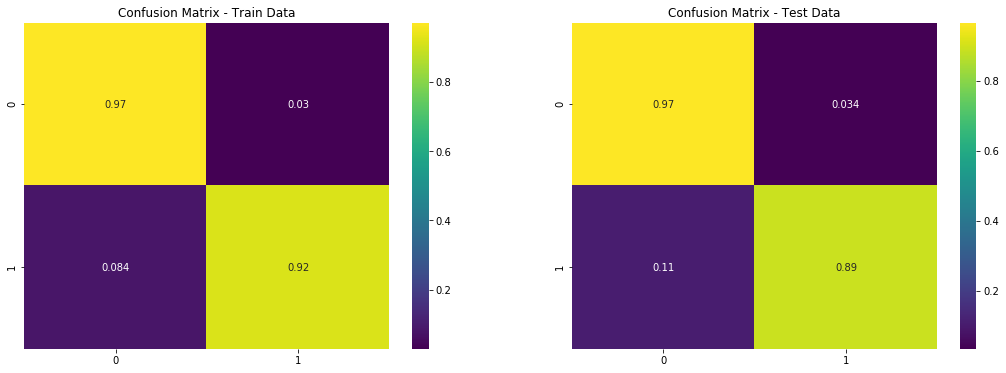

In [22]:
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

#Applying Linear regression model
log_reg = LogisticRegression()

train_test_model(log_reg, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.9440914866581956
F1 Score:  0.940379403794038
Precision Score:  0.9747191011235955
Recall Score:  0.9083769633507853

Accuracy Scores on Cross validation data
F1 Score:  0.9236947791164659
Precision Score:  0.9452054794520548
Recall Score:  0.9031413612565445

Accuracy Scores on Test data

Accuracy score: 0.9086294416243654
F1 Score:  0.9134615384615384
Precision Score:  0.9693877551020408
Recall Score:  0.8636363636363636


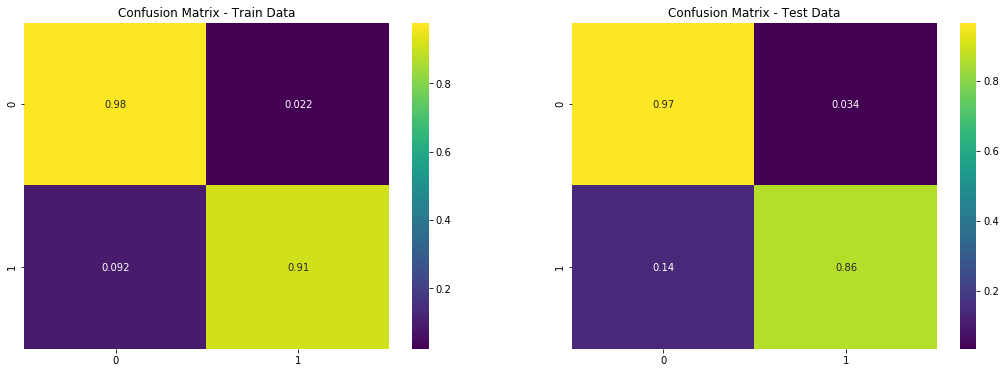

In [23]:
svc_clf = SVC(kernel='linear', degree=3,shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None)

train_test_model(svc_clf, x_train, x_test, y_train, y_test)




Accuracy Scores on Train data
Accuracy score: 0.9644218551461246
F1 Score:  0.9623655913978495
Precision Score:  0.988950276243094
Recall Score:  0.93717277486911

Accuracy Scores on Cross validation data
F1 Score:  0.9284750337381915
Precision Score:  0.958217270194986
Recall Score:  0.900523560209424

Accuracy Scores on Test data

Accuracy score: 0.9289340101522843
F1 Score:  0.9326923076923076
Precision Score:  0.9897959183673469
Recall Score:  0.8818181818181818


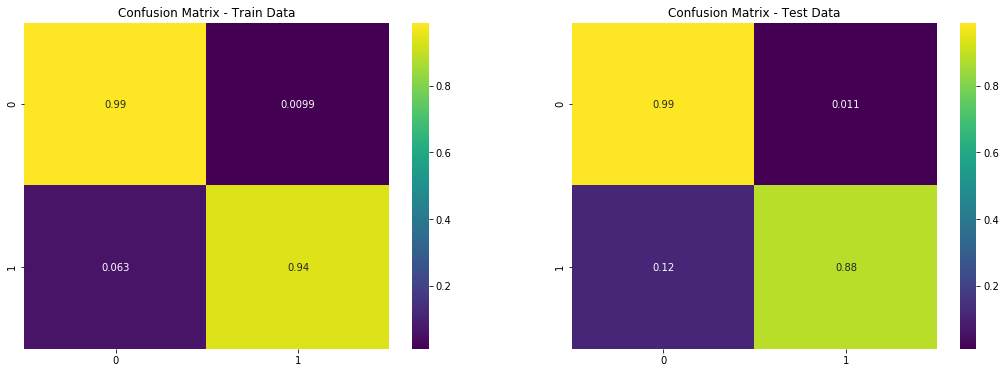

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors =3, metric='minkowski')
train_test_model(knn_clf, x_train, x_test, y_train, y_test)


